CC5213 - Recuperación de Información Multimedia
==

Slides 1.3 - Procesamiento de Imágenes
==

In [1]:
import sys
import os
import numpy
import cv2
from PyQt5.QtWidgets import QApplication, QFileDialog
import matplotlib.pyplot as plt

def mostrar_imagen(window_name, imagen):
    MAX_WIDTH = 700
    MAX_HEIGHT = 500
    if imagen.shape[0] > MAX_HEIGHT or imagen.shape[1] > MAX_WIDTH:
        #reducir tamaño
        fh = MAX_HEIGHT / imagen.shape[0]
        fw = MAX_WIDTH / imagen.shape[1]
        escala = min(fh, fw)
        imagen = cv2.resize(imagen, (0,0), fx=escala, fy=escala)
    #mostrar en pantalla
    cv2.imshow(window_name, imagen)

def ui_select_filenames():
    app = QApplication(list());
    options = QFileDialog.Options()
    files, _ = QFileDialog.getOpenFileNames(None, "Imagenes", ".", "Imagenes (*.jpg *.png)", options=options)
    return files

def abrir_imagen(filename):
    imagen_color = cv2.imread(filename, cv2.IMREAD_COLOR)
    if imagen_color is None:
        raise Exception("error abriendo {}".format(filename))
    return imagen_color

def histograma_gris(imagen_8bits):
    bins = range(0, 257, 1)
    xticks = list(range(0, 256, 64))
    xticks.append(255)
    plt.hist(imagen_8bits.reshape(-1), bins=bins, density=True)
    plt.xticks(xticks)
    plt.xlabel('grises')
    plt.ylabel('cantidad')
    plt.title('Histograma de intensidades')
    plt.show()

print("Usando OpenCV {} con Python {}.{}.{}".format(cv2.__version__, sys.version_info.major, sys.version_info.minor, sys.version_info.micro))


Usando OpenCV 4.4.0 con Python 3.6.10


## Ejemplo 1 - Histograma

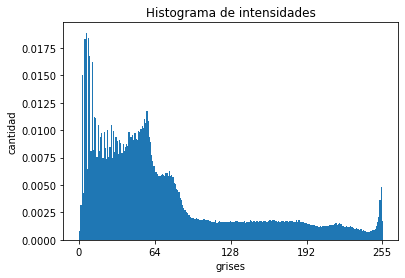

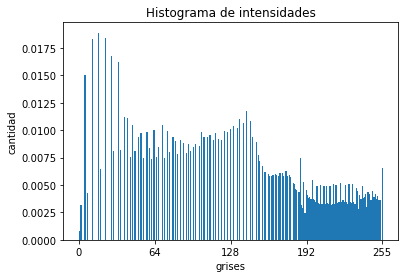

In [ ]:
def ejemplo(filename):
    imagen_color = abrir_imagen(filename)
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
    imagen_eq = cv2.equalizeHist(imagen_gris)
    mostrar_imagen(filename + " (gris)", imagen_gris)
    mostrar_imagen(filename + " (eq)", imagen_eq)
    histograma_gris(imagen_gris)
    histograma_gris(imagen_eq)

filenames = ui_select_filenames()

if len(filenames) > 0:
    for filename in filenames:
        ejemplo(filename)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
print("FIN")

## Ejemplo 2 - OTSU

In [ ]:
def ejemplo(filename):
    imagen_color = abrir_imagen(filename)
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
    threshold, imagen_bin = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    mostrar_imagen(filename, imagen_color)
    mostrar_imagen(filename + " (gris)", imagen_gris)
    mostrar_imagen(filename + " (bin)", imagen_bin)
    print ("{} size={} threshold={}".format(filename, imagen_color.shape, threshold))
    histograma_gris(imagen_gris)
    histograma_gris(imagen_bin)

filenames = ui_select_filenames()

if len(filenames) > 0:
    for filename in filenames:
        ejemplo(filename)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
print("FIN")